In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#โหลดฟังก์ชั่นที่เราเขียนไว้
from getData import *
import os


#get current path
cwd = os.getcwd()

#set data path
path = cwd+'/Data/egdata' # you can use your path
#download dataframe allStocks.csv
allStocks = pd.read_csv(path+'/allStocks.CSV')

In [50]:
#load list of stocks
stocklist = ['LH', 'JAS', 'STA', 'CK', 'KBANK']
df = pd.DataFrame()
for i in range(0,len(stocklist)):
    stock = getStock(stocklist[i], allStocks)
    df[i] = stock['Close']
    
#set columns name
df.columns = stocklist

#drop na 
df.dropna(inplace=True)

#selection period
df = df['2010':]

#normalization
dfNorm = (df/df.iloc[0]) *100
dfNorm.columns = stocklist


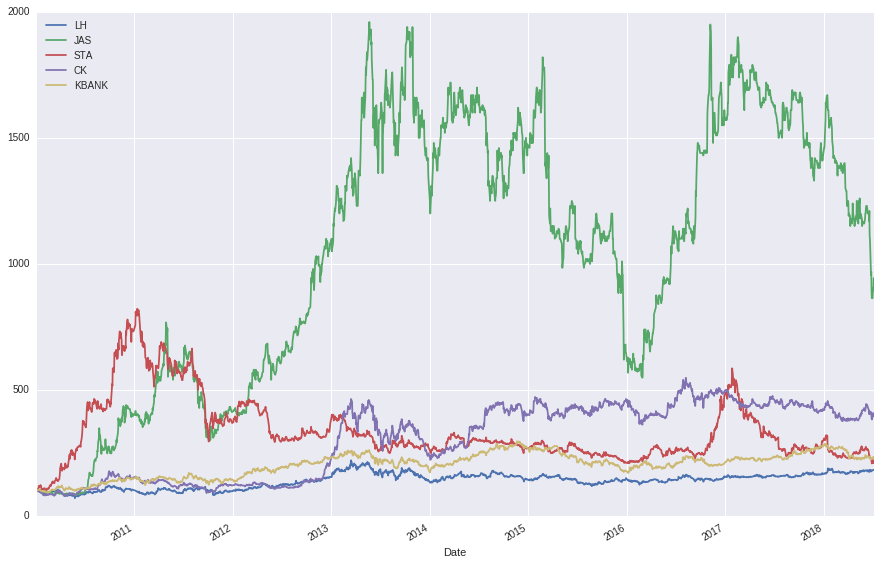

In [51]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 10.0)
dfNorm.plot()

# Modern Portfolio Theory

In [85]:
returns = np.log(dfNorm / dfNorm.shift(1))

#Calculate individual mean returns and covariance between the stocks

meanDailyReturns = returns.mean()
covMatrix = returns.cov()
corMatrix = returns.corr()
#Calculate expected portfolio performance

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
portReturn = np.sum( meanDailyReturns*weights )
portStdDev = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights)))

portReturn*245

0.13771235735343607

In [86]:
meanDailyReturns*245

LH       0.071227
JAS      0.265707
STA      0.087365
CK       0.164078
KBANK    0.100184
dtype: float64

In [87]:
np.dot(weights.T, np.dot(returns.cov() * 245, weights))

0.0602200967434616

In [55]:
corMatrix

,LH,JAS,STA,CK,KBANK
LH,1.000000,0.229661,0.218337,0.370798,0.397306
JAS,0.229661,1.000000,0.236335,0.290398,0.257153
STA,0.218337,0.236335,1.000000,0.286888,0.299701
CK,0.370798,0.290398,0.286888,1.000000,0.377303
KBANK,0.397306,0.257153,0.299701,0.377303,1.000000


In [68]:
portReturn*returns.shape[0]

1.1640909880774126

little verify

In [69]:
np.sum(returns.sum())/5

1.163528896822909

multiple

In [74]:
weights = np.random.random(len(stocklist))
weights /= np.sum(weights)
weights

array([0.09872401, 0.04966857, 0.28847245, 0.17440089, 0.38873408])

In [75]:
np.sum(weights)

1.0

In [76]:
np.sum(weights * returns.mean()) * 245

0.11299184133038713

In [80]:
np.dot(weights.T, np.dot(returns.cov() * 245, weights))

0.057710505764897516

In [ ]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(len(stocklist))
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

In [107]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [108]:
portfolios.head()

,Return,Volatility
0,0.116085,0.266227
1,0.120180,0.257492
2,0.152076,0.254696
3,0.168045,0.274942
4,0.127267,0.237905


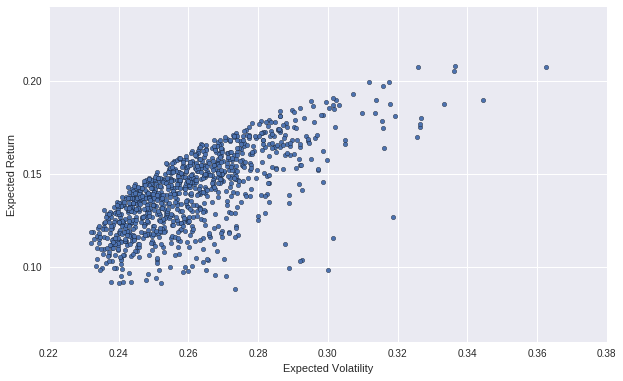

In [109]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

http://www.bradfordlynch.com/blog/2015/12/04/InvestmentPortfolioOptimization.html

https://medium.com/python-data/effient-frontier-in-python-34b0c3043314

https://medium.com/python-data/efficient-frontier-portfolio-optimization-with-python-part-2-2-2fe23413ad94

https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f